<h1 align="center">CAS Modeling</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
from lime import lime_tabular
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, GammaRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

sns.set_theme()

In [2]:
pd.set_option('display.max_columns',None)

## Importing data

In [3]:
df= pd.read_csv('CAS Preprocessed.csv')
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,X,Y,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,fatalCount,fence,flatHill,guardRail,houseOrBuilding,kerb,light,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,phoneBoxEtc,postOrPole,region,roadCharacter,roadLane,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,claimAmount
0,1406914.0,4915023.0,0.0,0.0,0.0,1.0,0.0,None,2000/2001,MIDLAND ST,PORTSMOUTH DRIVE,Non-Injury Crash,No,2000,0.0,East,0.0,0.0,0.0,Flat,0.0,0.0,0.0,Overcast,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otago Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,70.0,0.0,None,0.0,0.0,Dunedin City,Give way,0.0,0.0,0.0,0.0,0.0,0.0,Urban,1.0,0.0,0.0,Fine,91105.0
1,1799023.0,5814728.0,0.0,0.0,0.0,3.0,0.0,North,2011/2012,SH 1N,KILLARNEY ROAD,Non-Injury Crash,Yes,2012,0.0,South,0.0,0.0,0.0,Flat,0.0,0.0,0.0,Bright sun,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Waikato Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,60.0,0.0,None,0.0,0.0,Hamilton City,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,91554.0
2,1741193.0,5976099.0,0.0,0.0,0.0,1.0,1.0,North,2006/2007,SH 1N,SAUNDERS ROAD,Non-Injury Crash,Yes,2007,0.0,North,0.0,0.0,0.0,Flat,0.0,0.0,0.0,Twilight,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Auckland Region,Bridge,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,Auckland,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,81110.0
3,1790288.0,5837387.0,0.0,0.0,0.0,1.0,1.0,North,2006/2007,RIVERVIEW ROAD,HAKARIMATA ROAD,Non-Injury Crash,No,2006,0.0,North,0.0,0.0,0.0,Flat,0.0,0.0,0.0,Overcast,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Waikato Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,Waikato District,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,89788.0
4,1615675.0,5423627.0,0.0,0.0,0.0,2.0,0.0,None,2003/2004,TALBOT ST,ELIZABETH ST,Non-Injury Crash,No,2003,0.0,West,0.0,0.0,0.0,Flat,0.0,0.0,0.0,Overcast,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tasman Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,50.0,0.0,None,0.0,0.0,Tasman District,Give way,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,54222.0


In [4]:
df.shape

(758006, 62)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758006 entries, 0 to 758005
Data columns (total 62 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   X                          758006 non-null  float64
 1   Y                          758006 non-null  float64
 2   bicycle                    758006 non-null  float64
 3   bridge                     758006 non-null  float64
 4   bus                        758006 non-null  float64
 5   carStationWagon            758006 non-null  float64
 6   cliffBank                  758006 non-null  float64
 7   crashDirectionDescription  758006 non-null  object 
 8   crashFinancialYear         758006 non-null  object 
 9   crashLocation1             758006 non-null  object 
 10  crashLocation2             758006 non-null  object 
 11  crashSeverity              758006 non-null  object 
 12  crashSHDescription         758006 non-null  object 
 13  crashYear                  75

In [6]:
null_columns = df.columns[df.isnull().any()]
(df[null_columns].isnull().sum()/len(df))*100

Series([], dtype: float64)

In [7]:
df['Log_claimAmount'] = np.log(df['claimAmount'])

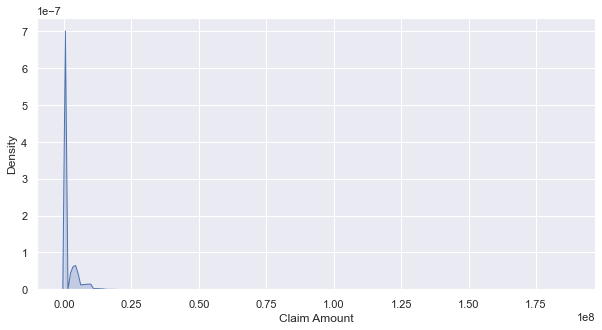

In [8]:
plt.figure(figsize=(10,5))
plt.xlabel('Claim Amount')
plt.ylabel('Density')
sns.kdeplot(df['claimAmount'],shade=True)
plt.show()

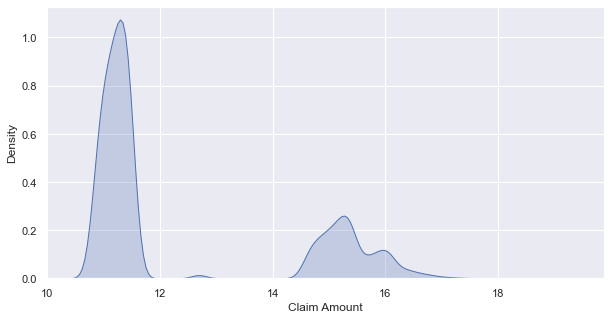

In [9]:
plt.figure(figsize=(10,5))
plt.xlabel('Claim Amount')
plt.ylabel('Density')
sns.kdeplot(df['Log_claimAmount'],shade=True)
plt.show()

## Modeling

### LIME

In [10]:
def lime(model, X_test, y_test, X_train, y_train):
    explainer = lime_tabular.LimeTabularExplainer(X_train.values, mode="regression", feature_names= X_train.columns)
    random.seed(108)
    idx = random.randint(1, len(X_test))
    print("Prediction : ", model.predict(X_test.iloc[idx]))
    print("Actual :     ", y_test.iloc[idx])

    explanation = explainer.explain_instance(X_test.iloc[idx], model.predict, num_features=len(X_train.columns))
    return explanation

In [11]:
def multicollinearity_assumption(model, features, label, feature_names=None):        
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

In [12]:
def calculate_residuals(model, features, label, transformation=False):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label.squeeze(1), 'Predicted': predictions})
    if not transformation:
        df_results['Residuals'] = (df_results['Actual'] - df_results['Predicted'])
        df_results['Residuals_per'] = abs(df_results['Residuals']/df_results['Actual'])
    if transformation:
        df_results['ActualT'] = np.exp(df_results['Actual'])
        df_results['PredictedT'] = np.exp(df_results['Predicted'])
        df_results['Residuals'] = (df_results['ActualT'] - df_results['PredictedT'])
        df_results['Residuals_per'] = abs(df_results['Residuals']/df_results['ActualT'])
        
    return df_results

In [13]:
def homoscedasticity_assumption(model, features, label):     
    df_results = calculate_residuals(model, features, label)

    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    plt.title('Residuals')
    plt.show()  

In [14]:
def normal_errors_assumption(model, features, label):
    df_results = calculate_residuals(model, features, label) 
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()

In [15]:
def Feature_imp(Model,n,X,y):
    model = Model
    # create the RFE model and select attributes
    rfe = RFE(model,n_features_to_select= n)
    rfe = rfe.fit(X, y)
    # summarize the selection of the attributes
    return pd.DataFrame({'Decision':rfe.support_,'Feature':X.columns})

### Gamma distribution

In [16]:
formula = "claimAmount ~ bicycle+bridge+bus+carStationWagon+cliffBank+debris+ditch+fence+flatHill+guardRail+houseOrBuilding+kerb+moped+motorcycle+NumberOfLanes+objectThrownOrDropped+otherObject+otherVehicleType+overBank+parkedVehicle+phoneBoxEtc+postOrPole+roadworks+schoolBus+slipOrFlood+speedLimit+strayAnimal+streetLight+suv+taxi+trafficIsland+trafficSign+train+tree+truck+unknownVehicleType+urban+vanOrUtility+vehicle+waterRiver"
y, X = dmatrices(formula, df, return_type='dataframe')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [18]:
Feature = Feature_imp(GammaRegressor(),15,X_test,y_test)
Feature[Feature.Decision == True]

,Decision,Feature
1,True,flatHill[T.Hill Road]
2,True,flatHill[T.None]
3,True,streetLight[T.Off]
6,True,bicycle
9,True,carStationWagon
10,True,cliffBank
14,True,guardRail
17,True,moped
18,True,motorcycle
19,True,NumberOfLanes


In [19]:
X_train_gamma, y_train_gamma = X_train[['Intercept','flatHill[T.Hill Road]','flatHill[T.None]','streetLight[T.Off]','bicycle','carStationWagon','cliffBank','guardRail','moped','motorcycle','NumberOfLanes','parkedVehicle','postOrPole','speedLimit','tree','truck']],y_train
X_test_gamma, y_test_gamma = X_test[['Intercept','flatHill[T.Hill Road]','flatHill[T.None]','streetLight[T.Off]','bicycle','carStationWagon','cliffBank','guardRail','moped','motorcycle','NumberOfLanes','parkedVehicle','postOrPole','speedLimit','tree','truck']],y_test

In [20]:
model_gamma = sm.GLM(y_train_gamma, X_train_gamma,family=sm.families.Gamma(link=sm.families.links.log())).fit()

In [21]:
model_gamma.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Generalized linear model
=======================================================================
Model:                 GLM               AIC:             17952065.9547
Link Function:         log               BIC:             -5872408.5458
Dependent Variable:    claimAmount       Log-Likelihood:  -8.9760e+06  
Date:                  2022-04-17 21:34  LL-Null:         -8.9897e+06  
No. Observations:      606404            Deviance:        2.2018e+06   
Df Model:              15                Pearson chi2:    2.71e+06     
Df Residuals:          606388            Scale:           4.4742       
Method:                IRLS                                            
-----------------------------------------------------------------------
                       Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept             13.6451   0.0134 1016.8685 0.0000 13.6188 13.6714
flatHill[T.Hill Road]  0.0825   0.0070   11.7444 0.0000  0.0687  0.0963
flatHill[T.None]      -1.0295   0.0325  -31.6487 0.0000 -1.0933 -0.9657
streetLight[T.Off]    -0.1491   0.0064  -23.1751 0.0000 -0.1617 -0.1365
bicycle                1.0308   0.0162   63.5695 0.0000  0.9990  1.0626
carStationWagon       -0.0288   0.0040   -7.1767 0.0000 -0.0366 -0.0209
cliffBank              0.2207   0.0141   15.6855 0.0000  0.1931  0.2483
guardRail             -0.0822   0.0161   -5.1128 0.0000 -0.1137 -0.0507
moped                  1.0435   0.0321   32.5268 0.0000  0.9807  1.1064
motorcycle             0.9250   0.0146   63.4891 0.0000  0.8964  0.9535
NumberOfLanes         -0.0355   0.0030  -12.0441 0.0000 -0.0413 -0.0298
parkedVehicle         -0.3183   0.0089  -35.9216 0.0000 -0.3356 -0.3009
postOrPole             0.2898   0.0127   22.8428 0.0000  0.2650  0.3147
speedLimit             0.0104   0.0001   77.6744 0.0000  0.0101  0.0106
tree                   0.4131   0.0140   29.5020 0.0000  0.3856  0.4405
truck                 -0.0702   0.0100   -6.9894 0.0000 -0.0899 -0.0505
=======================================================================

"""

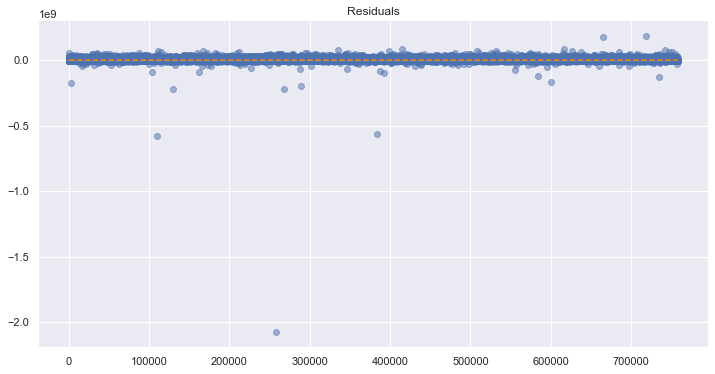

In [22]:
homoscedasticity_assumption(model_gamma,X_train_gamma,y_train_gamma)

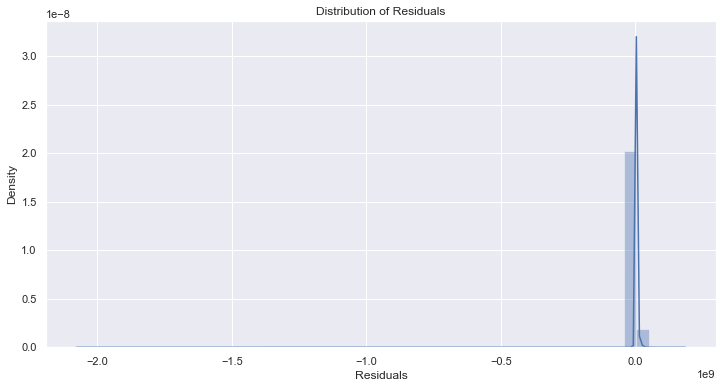

In [23]:
normal_errors_assumption(model_gamma,X_train_gamma,y_train_gamma)

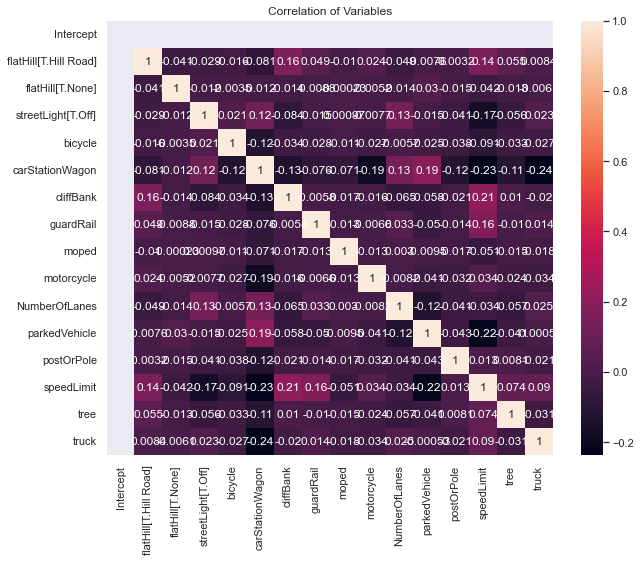

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Intercept: 1.2961755477681836
flatHill[T.Hill Road]: 1.008289118311191
flatHill[T.None]: 1.3976734146158099
streetLight[T.Off]: 1.0412527220814898
bicycle: 4.0993327611346535
carStationWagon: 1.1362814830890962
cliffBank: 1.0654344037603345
guardRail: 1.0118223044421575
moped: 1.0787188308560527
motorcycle: 5.9008123120911256
NumberOfLanes: 1.1675269262902614
parkedVehicle: 1.0607855715394046
postOrPole: 5.552729575567415
speedLimit: 1.0640882642831069
tree: 1.1752000756735421

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [24]:
multicollinearity_assumption(model_gamma,X_train_gamma.drop('Intercept',axis=1),y_train_gamma,X_train_gamma.columns)

In [25]:
ypred_gtrain = model_gamma.predict(X_train_gamma)
RMSE_gtrain = np.sqrt(mean_squared_error(y_train_gamma,ypred_gtrain))
print("RMSE Of Gamma for train:",RMSE_gtrain)
MAE_gtrain = mean_absolute_error(y_train_gamma,ypred_gtrain)
print("MAE Of Gamma for train:",MAE_gtrain)

RMSE Of Gamma for train: 4417667.9442189485
MAE Of Gamma for train: 2121362.8156501697


In [26]:
ypred_gtest = model_gamma.predict(X_test_gamma)
RMSE_gtest = np.sqrt(mean_squared_error(y_test_gamma,ypred_gtest))
print("RMSE Of Gamma for test:",RMSE_gtest)
MAE_gtest = mean_absolute_error(y_test_gamma,ypred_gtest)
print("MAE Of Gamma for test:",MAE_gtest)

RMSE Of Gamma for test: 3828652.0533824363
MAE Of Gamma for test: 2125960.1296303845


In [27]:
print(RMSE_gtrain/(y_train_gamma.max()-y_train_gamma.min()))
print(RMSE_gtest/(y_test_gamma.max()-y_test_gamma.min()))

claimAmount    0.023654
dtype: float64
claimAmount    0.037618
dtype: float64


In [28]:
df_gamma_Results = calculate_residuals(model_gamma,X_test_gamma,y_test_gamma)
df_gamma_Results.head()

,Actual,Predicted,Residuals,Residuals_per
70146,82595.0,1.281336e+06,-1.198741e+06,14.513484
420769,3711618.0,4.066207e+06,-3.545888e+05,0.095535
181348,96564.0,1.072554e+06,-9.759896e+05,10.107179
117240,98426.0,8.799794e+05,-7.815534e+05,7.940518
627046,82819.0,1.352096e+06,-1.269277e+06,15.325920


In [29]:
df_gamma_Results[df_gamma_Results['Residuals_per']<=.5]

,Actual,Predicted,Residuals,Residuals_per
420769,3711618.0,4.066207e+06,-3.545888e+05,0.095535
110031,5957917.0,3.388433e+06,2.569484e+06,0.431272
613930,2092474.0,1.131784e+06,9.606899e+05,0.459117
1864,4821419.0,3.251584e+06,1.569835e+06,0.325596
460173,2277308.0,2.336286e+06,-5.897830e+04,0.025898
...,...,...,...,...
29232,3219689.0,2.336286e+06,8.834027e+05,0.274375
373927,2702965.0,1.907327e+06,7.956378e+05,0.294357
228056,2926861.0,2.151264e+06,7.755969e+05,0.264993
224780,3088655.0,2.090287e+06,9.983679e+05,0.323237


In [30]:
df_gamma_Results[df_gamma_Results['Residuals_per']>.5]

,Actual,Predicted,Residuals,Residuals_per
70146,82595.0,1.281336e+06,-1.198741e+06,14.513484
181348,96564.0,1.072554e+06,-9.759896e+05,10.107179
117240,98426.0,8.799794e+05,-7.815534e+05,7.940518
627046,82819.0,1.352096e+06,-1.269277e+06,15.325920
735073,99326.0,9.056498e+05,-8.063238e+05,8.117953
...,...,...,...,...
321591,99621.0,1.245017e+06,-1.145396e+06,11.497536
422987,65947.0,1.281336e+06,-1.215389e+06,18.429787
272132,89954.0,2.151264e+06,-2.061310e+06,22.915157
652278,5228922.0,1.421246e+06,3.807676e+06,0.728195


### LIME

In [31]:
explanation_gamma = lime(model_gamma,X_test_gamma,y_test_gamma,X_train_gamma,y_train_gamma)
explanation_gamma.show_in_notebook()

Prediction :  None    1.281336e+06
dtype: float64
Actual :      claimAmount    4094804.0
Name: 229237, dtype: float64


### Log normal distribution

In [32]:
formula = "Log_claimAmount ~ bicycle+bridge+bus+carStationWagon+cliffBank+debris+ditch+fence+flatHill+guardRail+houseOrBuilding+kerb+moped+motorcycle+NumberOfLanes+objectThrownOrDropped+otherObject+otherVehicleType+overBank+parkedVehicle+phoneBoxEtc+postOrPole+roadworks+schoolBus+slipOrFlood+speedLimit+strayAnimal+streetLight+suv+taxi+trafficIsland+trafficSign+train+tree+truck+unknownVehicleType+urban+vanOrUtility+vehicle+waterRiver"
y, X = dmatrices(formula, df, return_type='dataframe')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [52]:
Feature = Feature_imp(LinearRegression(),15,X_test,y_test)
Feature[Feature.Decision == True]

,Decision,Feature
2,True,flatHill[T.None]
5,True,urban[T.Urban]
6,True,bicycle
10,True,cliffBank
11,True,debris
15,True,houseOrBuilding
17,True,moped
18,True,motorcycle
20,True,objectThrownOrDropped
28,True,schoolBus


In [63]:
X_train_ols, y_train_ols = X_train[['Intercept','flatHill[T.None]','urban[T.Urban]','bicycle','bridge','debris','cliffBank','houseOrBuilding','moped','motorcycle','objectThrownOrDropped','schoolBus','strayAnimal','train','tree','waterRiver']],y_train
X_test_ols, y_test_ols = X_test[['Intercept','flatHill[T.None]','urban[T.Urban]','bicycle','bridge','debris','cliffBank','houseOrBuilding','moped','motorcycle','objectThrownOrDropped','schoolBus','strayAnimal','train','tree','waterRiver']],y_test

In [64]:
model_ols = sm.GLM(y_train_ols, X_train_ols,family=sm.families.Gaussian(link=sm.families.links.identity())).fit()

In [65]:
model_ols.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Generalized linear model
=======================================================================
Model:                 GLM               AIC:             2450468.0995 
Link Function:         identity          BIC:             -6054751.0831
Dependent Variable:    Log_claimAmount   Log-Likelihood:  -1.2252e+06  
Date:                  2022-04-17 21:36  LL-Null:         -1.2594e+06  
No. Observations:      606404            Deviance:        2.0195e+06   
Df Model:              15                Pearson chi2:    2.02e+06     
Df Residuals:          606388            Scale:           3.3304       
Method:                IRLS                                            
-----------------------------------------------------------------------
                       Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept             12.5754   0.0045 2824.7600 0.0000 12.5667 12.5841
flatHill[T.None]      -0.7228   0.0280  -25.8106 0.0000 -0.7777 -0.6679
urban[T.Urban]        -0.5013   0.0052  -96.4167 0.0000 -0.5115 -0.4911
bicycle                2.1712   0.0137  158.1295 0.0000  2.1443  2.1981
bridge                 0.3906   0.0313   12.4880 0.0000  0.3293  0.4519
debris                -0.3741   0.0391   -9.5685 0.0000 -0.4507 -0.2974
cliffBank              0.5070   0.0119   42.6194 0.0000  0.4837  0.5303
houseOrBuilding        0.3330   0.0242   13.7542 0.0000  0.2856  0.3805
moped                  2.1745   0.0275   79.0517 0.0000  2.1206  2.2285
motorcycle             1.9063   0.0122  156.0254 0.0000  1.8823  1.9302
objectThrownOrDropped -0.5022   0.0726   -6.9195 0.0000 -0.6445 -0.3600
schoolBus              0.7505   0.0888    8.4552 0.0000  0.5765  0.9245
strayAnimal           -0.5325   0.0778   -6.8421 0.0000 -0.6851 -0.3800
train                  0.8303   0.0937    8.8655 0.0000  0.6467  1.0138
tree                   0.6199   0.0119   51.9148 0.0000  0.5965  0.6433
waterRiver             0.5709   0.0366   15.5836 0.0000  0.4991  0.6427
=======================================================================

"""

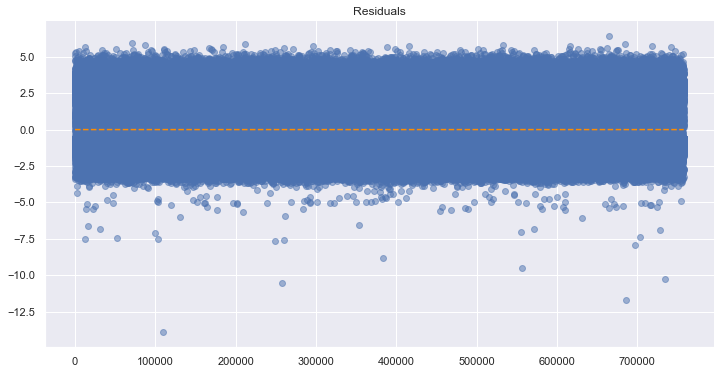

In [66]:
homoscedasticity_assumption(model_ols,X_train_ols,y_train_ols)

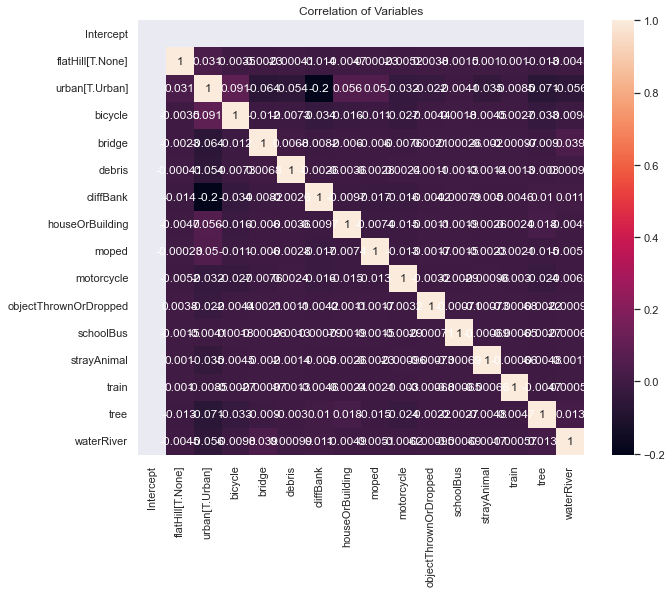

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Intercept: 1.0077466494557712
flatHill[T.None]: 1.109140676327998
urban[T.Urban]: 1.0389054255344272
bicycle: 1.0025830035210799
bridge: 1.000456995626162
debris: 1.0057772595853511
cliffBank: 1.0137874086129481
houseOrBuilding: 1.010216835371711
moped: 1.0189887417324432
motorcycle: 1.0001566304172491
objectThrownOrDropped: 1.0003886637478954
schoolBus: 1.000027099367896
strayAnimal: 1.0002639781535771
train: 1.0192252979978416
tree: 1.00328462208381

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [67]:
multicollinearity_assumption(model_ols,X_train_ols.drop('Intercept',axis=1),y_train_ols,X_train_ols.columns)

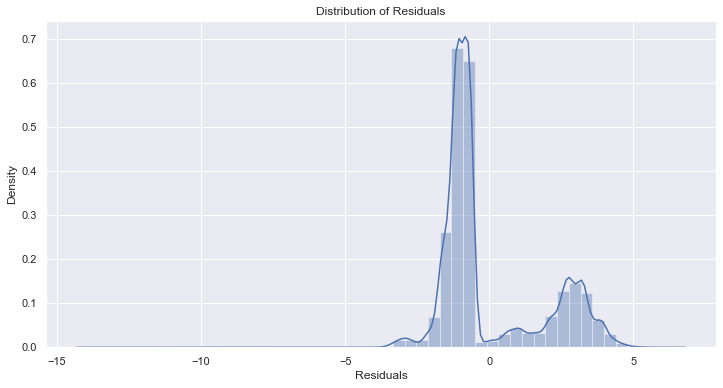

In [68]:
normal_errors_assumption(model_ols,X_train_ols,y_train_ols)

In [69]:
ypred_ltrain = model_ols.predict(X_train_ols)
RMSE_ltrain = np.sqrt(mean_squared_error(y_train_ols,ypred_ltrain))
print("RMSE Of Log-Normal for train:",RMSE_ltrain)
MAE_ltrain = mean_absolute_error(y_train_ols,ypred_ltrain)
print("MAE Of Log-Normal for train:",MAE_ltrain)

RMSE Of Log-Normal for train: 1.8249023038110477
MAE Of Log-Normal for train: 1.54838412421996


In [70]:
ypred_ltest = model_ols.predict(X_test_ols)
RMSE_ltest = np.sqrt(mean_squared_error(y_test_ols,ypred_ltest))
print("RMSE Of Log-Normal for test:",RMSE_ltest)
MAE_ltest = mean_absolute_error(y_test_ols,ypred_ltest)
print("MAE Of Log-Normal for test:",MAE_ltest)

RMSE Of Log-Normal for test: 1.8245437517257364
MAE Of Log-Normal for test: 1.5475530475327572


In [71]:
print(RMSE_ltrain/(y_train_ols.max()-y_train_ols.min()))
print(RMSE_ltest/(y_test_ols.max()-y_test_ols.min()))

Log_claimAmount    0.22185
dtype: float64
Log_claimAmount    0.239472
dtype: float64


In [72]:
df_ols_results_t = calculate_residuals(model_ols,X_train_ols,y_train_ols,True)
df_ols_results_t.head()

,Actual,Predicted,ActualT,PredictedT,Residuals,Residuals_per
334442,10.958009,12.074122,57412.0,1.752769e+05,-1.178649e+05,2.052966
217829,11.358620,12.074122,85701.0,1.752769e+05,-8.957591e+04,1.045214
216600,15.792582,12.074122,7221561.0,1.752769e+05,7.046284e+06,0.975729
189842,14.620393,14.481674,2236434.0,1.946755e+06,2.896790e+05,0.129527
237693,10.845797,12.575386,51318.0,2.893482e+05,-2.380302e+05,4.638337


In [73]:
df_ols_results = calculate_residuals(model_ols,X_test_ols,y_test_ols,True)
df_ols_results.head()

,Actual,Predicted,ActualT,PredictedT,Residuals,Residuals_per
70146,11.321704,12.074122,82595.0,1.752769e+05,-9.268191e+04,1.122125
420769,15.126978,14.248671,3711618.0,1.542124e+06,2.169494e+06,0.584514
181348,11.477961,12.074122,96564.0,1.752769e+05,-7.871291e+04,0.815137
117240,11.497060,12.074122,98426.0,1.752769e+05,-7.685091e+04,0.780799
627046,11.324413,12.074122,82819.0,1.752769e+05,-9.245791e+04,1.116385


In [74]:
RMSE_ltrain = np.sqrt(mean_squared_error(df_ols_results_t['ActualT'],df_ols_results_t['PredictedT']))
print("RMSE Of Log-Normal for train:",RMSE_ltrain)
MAE_ltrain = mean_absolute_error(df_ols_results_t['ActualT'],df_ols_results_t['PredictedT'])
print("MAE Of Log-Normal for train:",MAE_ltrain)

RMSE Of Log-Normal for train: 949079075.4191837
MAE Of Log-Normal for train: 3074328.5501208664


In [75]:
RMSE_ltest = np.sqrt(mean_squared_error(df_ols_results['ActualT'],df_ols_results['PredictedT']))
print("RMSE Of Log-Normal for test:",RMSE_ltest)
MAE_ltest = mean_absolute_error(df_ols_results['ActualT'],df_ols_results['PredictedT'])
print("MAE Of Log-Normal for test:",MAE_ltest)

RMSE Of Log-Normal for test: 91685266.00669242
MAE Of Log-Normal for test: 2128994.7420541006


In [76]:
df_ols_results[df_ols_results['Residuals_per']<.5]

,Actual,Predicted,ActualT,PredictedT,Residuals,Residuals_per
508616,11.059629,11.351288,63553.0,8.507499e+04,-2.152199e+04,0.338646
640264,14.901397,14.248671,2962064.0,1.542124e+06,1.419940e+06,0.479375
388574,15.008579,14.481674,3297183.0,1.946755e+06,1.350428e+06,0.409570
96977,14.745776,14.481674,2535182.0,1.946755e+06,5.884270e+05,0.232104
310576,14.861198,14.481674,2845353.0,1.946755e+06,8.985980e+05,0.315812
...,...,...,...,...,...,...
473767,12.703278,12.074122,328824.0,1.752769e+05,1.535471e+05,0.466958
520146,12.709378,12.074122,330836.0,1.752769e+05,1.555591e+05,0.470200
745342,11.074529,11.351288,64507.0,8.507499e+04,-2.056799e+04,0.318849
236301,14.614319,13.980411,2222891.0,1.179275e+06,1.043616e+06,0.469486


In [77]:
df_ols_results[df_ols_results['Residuals_per']>.5]

,Actual,Predicted,ActualT,PredictedT,Residuals,Residuals_per
70146,11.321704,12.074122,82595.0,1.752769e+05,-9.268191e+04,1.122125
420769,15.126978,14.248671,3711618.0,1.542124e+06,2.169494e+06,0.584514
181348,11.477961,12.074122,96564.0,1.752769e+05,-7.871291e+04,0.815137
117240,11.497060,12.074122,98426.0,1.752769e+05,-7.685091e+04,0.780799
627046,11.324413,12.074122,82819.0,1.752769e+05,-9.245791e+04,1.116385
...,...,...,...,...,...,...
321591,11.509128,12.074122,99621.0,1.752769e+05,-7.565591e+04,0.759437
422987,11.096607,12.074122,65947.0,1.752769e+05,-1.093299e+05,1.657845
272132,11.407054,12.575386,89954.0,2.893482e+05,-1.993942e+05,2.216624
652278,15.469716,12.074122,5228922.0,1.752769e+05,5.053645e+06,0.966479


### LIME

In [78]:
explanation_ols = lime(model_ols,X_test_ols,y_test_ols,X_train_ols,y_test_ols)
explanation_ols.show_in_notebook()

Prediction :  None    12.074122
dtype: float64
Actual :      Log_claimAmount    15.225229
Name: 229237, dtype: float64
